# Introduction

In this notebook, I will try to analyze the Titanic Dataset and tentatively determine if passenger’s chances of surviving the sinking ship is related to their gender, age or social class. Some of the interesting questions I want to answer at the end of this analysis are:
- Analyze the influence of social class in the survival. Do the chances of survival increase with social class?
- Are females more likely to survive than males?
- Are children more likely to survive than adults?


In [1]:
## Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load dataset
titanic_df = pd.read_csv("titanic-data.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## check row and column count
print (titanic_df.shape)

(891, 12)


# 1. Data Wrangling and Exploration 

In this section , I will explore data to decide which information are useful to help me answer the above questions.
First , I will analyze  missing values for each column.

### 1.1 Check Missing Values in each column

In [5]:
def count_missing_values(x):
    return sum(x.isnull())

## Apply function for each column
print("Missing values per column:")
print(titanic_df.apply(count_missing_values,axis=0))

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From the above output , we can see that Age, Cabin and Embark contains null and incomplete values and they require correcting.

### 1.2 Check Data Type of each Column

In [6]:
## Data Types of each column 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 1.3 Distribution of numerical values across the sample

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.4 Correcting the dataset 

I decided to drop the below columns from my dataset:
1. Name : there is no direct contribution between name and the survival of the passenger.   
2. PassengerId: can be dropped from my analysis. 
3. Cabin: contains 687 missing value. 77% of the values are missing.
4. Ticket: same reason as the Name column 

In [8]:
# drop all column not used in this analysis 
# Except Survived, Pclass ,Sex, Age and Embarked column
titanic_df = titanic_df.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)

In [9]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


###  1.5 Imputing missing values 

I will use fillna() function.It will update missing values with the mode of the Age column 

In [10]:
## Importing scipy library to calculate the mode 
from scipy.stats import mode
mode_value=mode(titanic_df['Age']).mode[0]
mode_value

24.0

In [11]:
## use fillna function to fill NaaN values with the mode of Age column
titanic_df['Age'].fillna(mode_value, inplace=True)

In [12]:
#check the missing values 
print("Missing values per column:")
print(titanic_df.apply(count_missing_values,axis=0))

Missing values per column:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


Missing values in the Age column are imputed.

In [13]:
# Create two data frames for each survival status
Survival_df=titanic_df[titanic_df.Survived==1]
Dead_df=titanic_df[titanic_df.Survived==0]

## 2. Data Analysis

### 2.1 Analyzing PClass Distribution

In [14]:
print (pd.crosstab(titanic_df['Survived'],titanic_df['Pclass']))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [15]:

## Count number of survivors per class and create a list

Survived=[Survival_df[Survival_df.Pclass==1].Sex.count(),Survival_df[Survival_df.Pclass==2].Sex.count(),Survival_df[Survival_df.Pclass==3].Sex.count()]
print(Survived)

[136, 87, 119]


In [16]:
## Count number of non- survivors per class and create a list
Died=[Dead_df[Dead_df.Pclass==1].Sex.count(),Dead_df[Dead_df.Pclass==2].Sex.count(),Dead_df[Dead_df.Pclass==3].Sex.count()]
print(Died)

[80, 97, 372]


In [17]:

def plot_bar_chart(list1,list2,N,chart_title,xticklabels):
    

    ind = np.arange(N)  # the x locations for PClasses
    width = 0.25       # the width of the bars
## This function creates a figure and a grid of subplots with a single call
    figure,ax = plt.subplots() ## a figure and one subplot
    rects1 = ax.bar(ind, list1, width, color='g')
    rects2 = ax.bar(ind + width, list2, width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of Passengers')
    ax.set_title(chart_title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xticklabels)
    ax.legend((rects1[0], rects2[0]), ('Survived', 'Died'))


    plt.show()
    return None

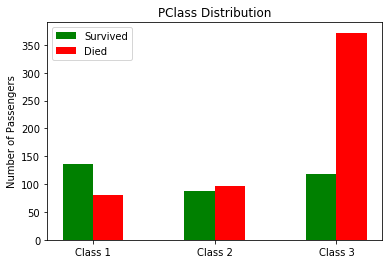

In [18]:
## Draw a bar chart to visulize the data 
title='PClass Distribution'
xticklabels=('Class 1', 'Class 2', 'Class 3')
plot_bar_chart(Survived,Died,3,title,xticklabels)

From the above graph we can tentatively conclude that:
- the lower class (Class 3) had more passengers, than all classes.
- the lower class had the lowest survival rate.
- The Upper Class (Class 1) passengers had the highest survival rate


### 2.2 Analyzing Gender Distribution

Analyze the data to see which gender has higher survival rate.

In [19]:
## Count number of survivors in each group
print (pd.crosstab(titanic_df['Survived'],titanic_df['Sex']))

Sex       female  male
Survived              
0             81   468
1            233   109


In [20]:
## Calculate the average survival per gender
print (titanic_df.groupby('Sex').Survived.mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [21]:
## Count number of survived passengers per sex , index 0 contains female count and index 1 contains males count
Survival_per_gender=Survival_df.groupby('Sex').size().values
Died_per_gender= Dead_df.groupby('Sex').size().values

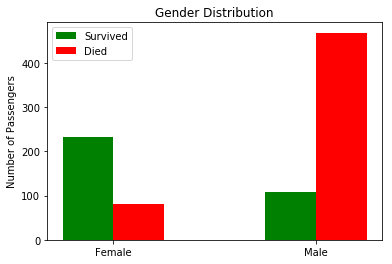

In [22]:
## Draw a bar chart to visulize the data 
title='Gender Distribution'
xticklabels=('Female', 'Male')
plot_bar_chart(Survival_per_gender,Died_per_gender,2,title,xticklabels)

From the above graph we can tentatively conclude that:

- Male passengers had the lowest survival rate.
- Female passengers had the highest survival rate

### 2.3 Analyzing Age Distribution

Analyze the data to see which age group has higher survival rate.

In [23]:
## define bins
bins = [0,10,17,25,80]
## Age group 
group_names = ['0-10', '11-17','18-25','26-80']

In [24]:
## cut Function convert ages to groups of age ranges
titanic_df['age_group'] = pd.cut(titanic_df['Age'], bins, labels=group_names)
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,0,3,male,22.0,1,0,7.2500,S,18-25
1,1,1,female,38.0,1,0,71.2833,C,26-80
2,1,3,female,26.0,0,0,7.9250,S,26-80
3,1,1,female,35.0,1,0,53.1000,S,26-80
4,0,3,male,35.0,0,0,8.0500,S,26-80


In [25]:
## Count number of observations per age group
pd.value_counts(titanic_df['age_group'])

26-80    413
18-25    365
0-10      64
11-17     49
Name: age_group, dtype: int64

In [26]:
## Count number of survivors in each group
print (pd.crosstab(titanic_df['Survived'],titanic_df['age_group']))

age_group  0-10  11-17  18-25  26-80
Survived                            
0            26     26    250    247
1            38     23    115    166


In [27]:
# Create a set grouped by age_group and calculate average survivors   
mean_group = titanic_df.groupby('age_group').Survived.mean().values
mean_group

array([ 0.59375   ,  0.46938776,  0.31506849,  0.40193705])

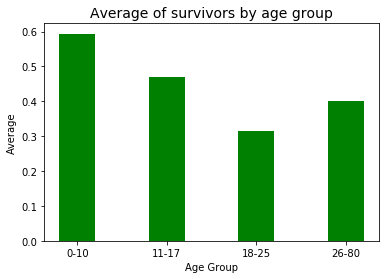

In [28]:
ax = plt.subplot()
plt_position = np.array(range(len(group_names)))

ax.bar(plt_position,mean_group,width=0.4,label='Age Group',color='green')

plt.xticks(np.array(range(len(group_names))),  group_names)
ax.set_ylabel("Average")
ax.set_xlabel("Age Group")
ax.set_title("Average of survivors by age group",fontsize=14)
plt.show()

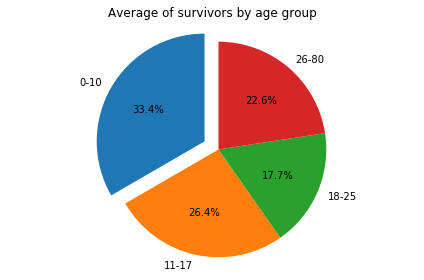

In [43]:

plt.pie(
    # using Mean Group data
   mean_group,
    # with the labels 
    labels=group_names,
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title("Average of survivors by age group")
# View the plot
plt.tight_layout()
plt.show()

Both plots shows that children 0-10 years old had a much higher proportion of survivors. 

## 3. Conclusion 

with the analyzed dataset we can conclude: 
- Missing data could affect the analysis: in this dataset I decided to impute the missing values with the mode of age instead of dropping the respective rows as it will affect the accurecy of class and gender analysis.